# Import libraries and dataset

In [1412]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.dpi'] = 150
import scipy.stats as stats
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [1413]:
df = pd.read_csv(r"C:\Users\Cris\Documents\Repos\TitanicML\titanic_train.csv")

In [1480]:
print("Train score: ", round(model.score(x_train, y_train), 4))
print("Validate score: ", round(model.score(x_validate, y_validate), 4))

Train score:  0.8399
Validate score:  0.8324


In [1481]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

In [1482]:
# x_train = df.drop(columns=["Survived"])
# y_train = df.Survived

In [1483]:
n_folds = 15
# cv_scores = cross_validate(model, x_train, y_train, cv = n_folds)
cv_score = cross_val_score(model, x_train, y_train, cv = n_folds, n_jobs=-1)

In [1484]:
print(cv_score.mean())
print(cv_score)

0.7962765957446808
[0.8125     0.83333333 0.875      0.8125     0.8125     0.70833333
 0.77083333 0.74468085 0.78723404 0.78723404 0.80851064 0.74468085
 0.76595745 0.78723404 0.89361702]


Folds 1, 4, 5, 12 can reveal what is going wrong - Gradient Boosting

Fold 12 performs well with MLPC - What???

In [1485]:
print("Datapoints per fold:", round(len(x_train)/n_folds))

Datapoints per fold: 47


In [1486]:
from sklearn.metrics import classification_report, confusion_matrix

In [1487]:
print(classification_report(y_train, model.predict(x_train), target_names=["Not survived", "Survived"]))

              precision    recall  f1-score   support

Not survived       0.83      0.92      0.87       427
    Survived       0.86      0.72      0.78       285

    accuracy                           0.84       712
   macro avg       0.84      0.82      0.83       712
weighted avg       0.84      0.84      0.84       712



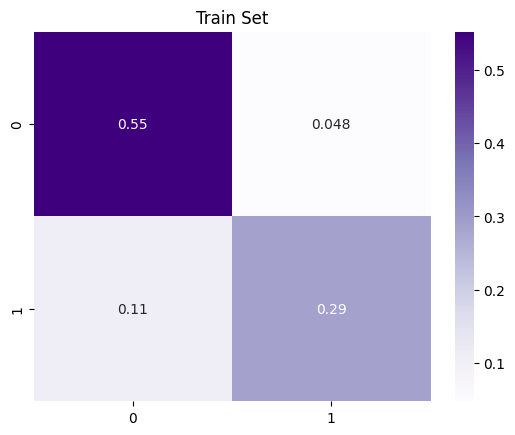

In [1488]:
sns.heatmap(confusion_matrix(y_train, model.predict(x_train), normalize="all"), annot=True, cmap="Purples")
plt.title("Train Set")
plt.show()

In [1489]:
print(classification_report(y_validate, model.predict(x_validate), target_names=["Not survived", "Survived"]))

              precision    recall  f1-score   support

Not survived       0.85      0.92      0.88       122
    Survived       0.79      0.65      0.71        57

    accuracy                           0.83       179
   macro avg       0.82      0.78      0.80       179
weighted avg       0.83      0.83      0.83       179



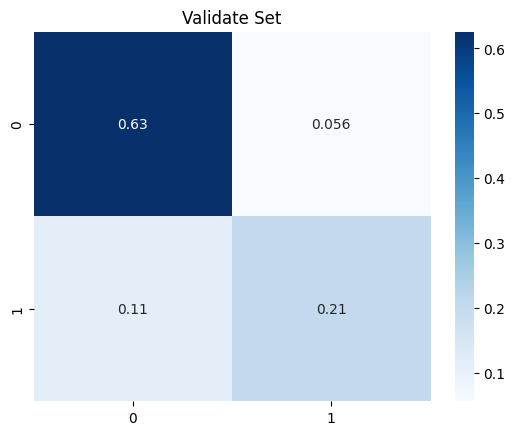

In [1490]:
sns.heatmap(confusion_matrix(y_validate, model.predict(x_validate), normalize="all"), annot=True, cmap="Blues")
plt.title("Validate Set")
plt.show()

In [1491]:
print(x_train.columns.to_list())
print(test.columns.to_list())

['Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Class1', 'Class2', 'Class3', 'Cherbourg', 'Queenstown', 'Southampton', 'Alone']
['Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Class1', 'Class2', 'Class3', 'Cherbourg', 'Queenstown', 'Southampton', 'Alone']


In [1492]:
predictions = model.predict(test)
submission = pd.DataFrame({"PassengerId":test_id, "Survived":predictions})
submission.head(10)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [1493]:
# Remember to update n for every new submission
n = 6
submit_predictions = False
if submit_predictions:
    submission.to_csv(f"./submissions/submission_{n}.csv", index=False)